In [1]:
!pip install minisom
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=89228bad40c02190fe43ae789c572faa153120a3253802fe45026f08508f3882
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn_som.som import SOM
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance
from sklearn.datasets import make_blobs, make_circles, make_s_curve

In [3]:
import numpy as np
import pandas as pd
import re

#============= Read CSV and apply data preperation =============#
df = pd.read_csv("Assignment3_dataset.csv")

In [4]:
    
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['Age'] = df['Age'].replace(0, df['Age'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].mean())



In [5]:
d=df.to_numpy()
data=df.iloc[:,:-1]
target=df['Outcome']
X = np.array(data)
Y= np.array(target)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
evaluation_LR = accuracy_score(y_test, predictions)

In [49]:
evaluation_LR
print(len(predictions))
print(len(y_test))

192
192


In [9]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.7604166666666666


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(x_train, y_train)
 
# Predict on dataset which model has not seen before

KNN_pred=knn.predict(x_test)
evaluation_KNN = accuracy_score(y_test, KNN_pred)
evaluation_KNN

0.75

TNSE for Trainig 

In [11]:
def draw_Tsne(x,y):
  
  data=x                               
  data_labels=y                        
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(data)  

  #plot tsne for x_test and x_train
  classes=unique_labels(data_labels)         
  target_ids = range(len(classes))
  plt.figure(figsize=(6, 5))
  colors = 'r', 'g'
  for i, c, label in zip(target_ids, colors, classes):
    plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
    
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


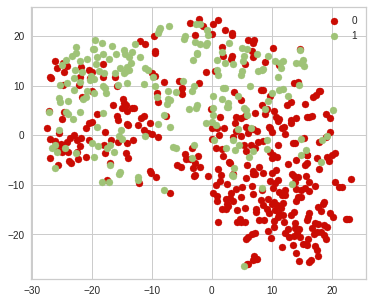

In [12]:
draw_Tsne(x_train,y_train)

TNSE for Testing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


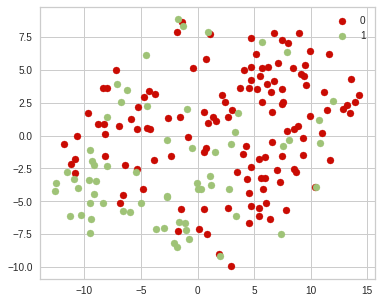

In [13]:
draw_Tsne(x_test,y_test)

For n_clusters = 2 The average silhouette_score is : 0.28130595959807386
For n_clusters = 3 The average silhouette_score is : 0.24069301404843046
For n_clusters = 4 The average silhouette_score is : 0.2047277763564496
For n_clusters = 5 The average silhouette_score is : 0.1931232930032335


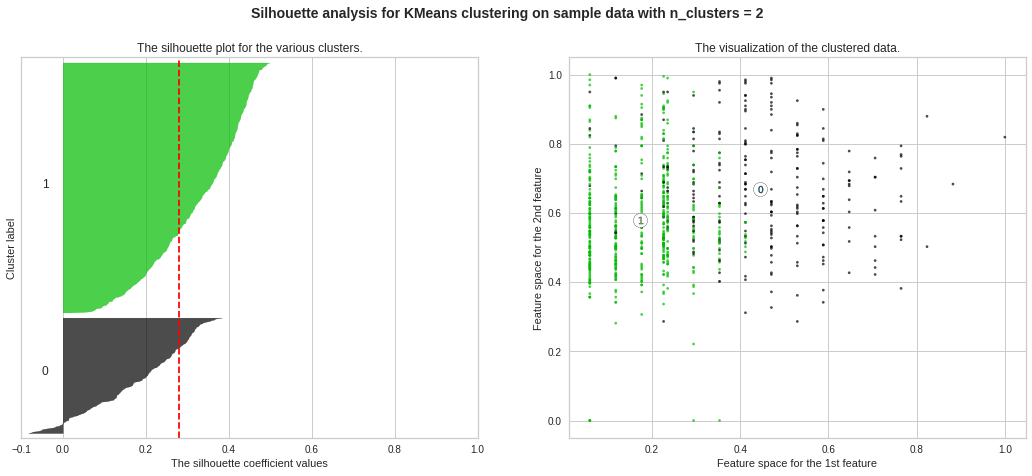

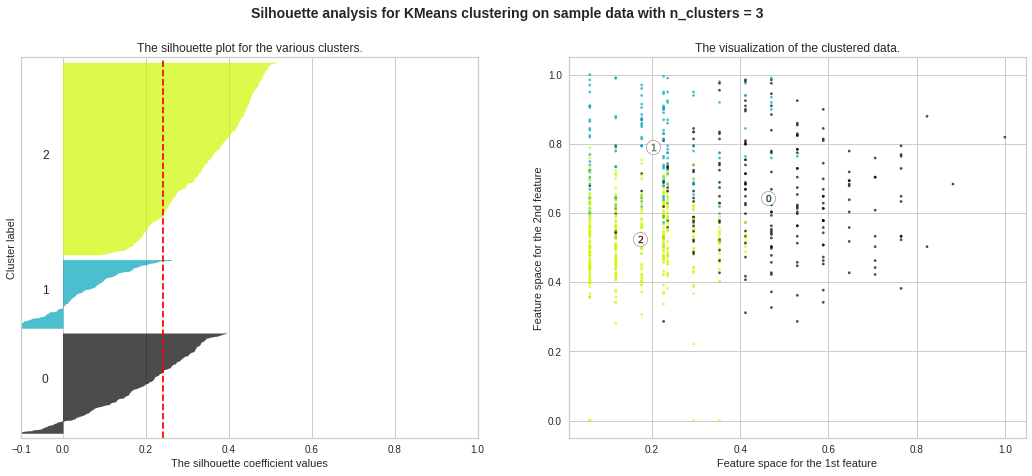

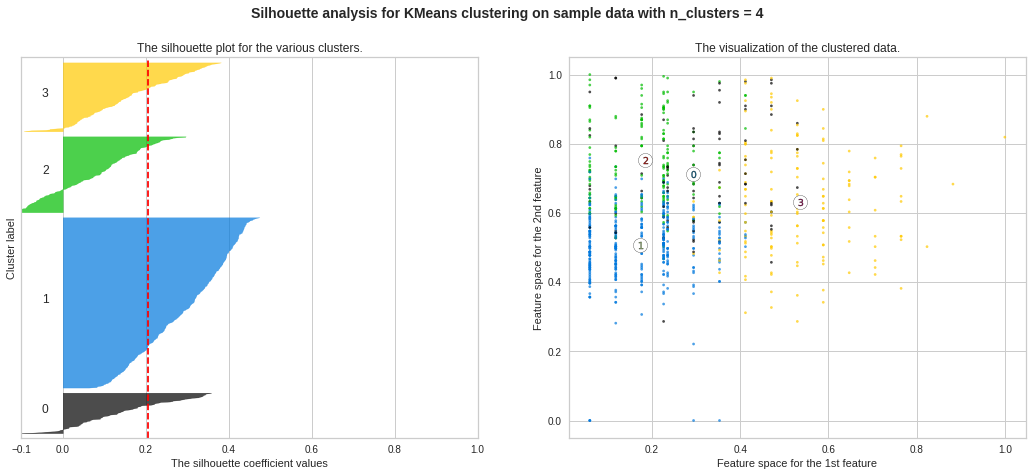

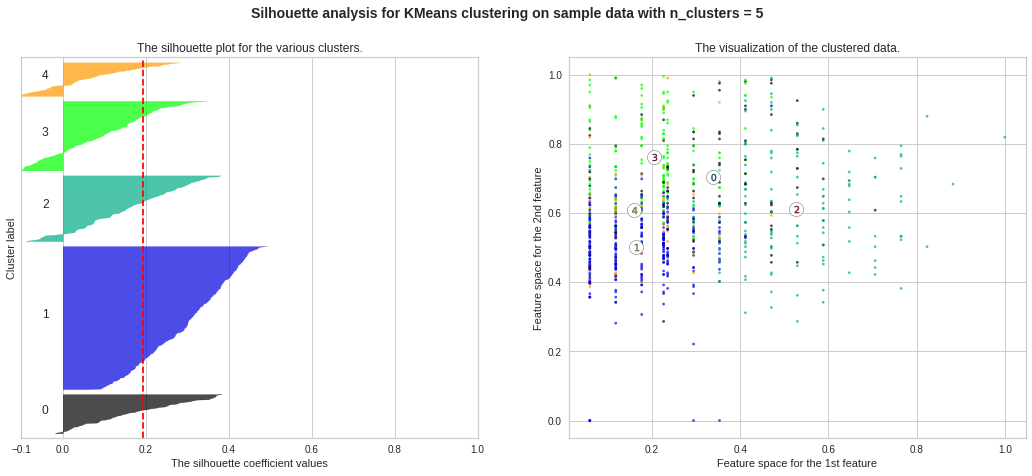

In [14]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

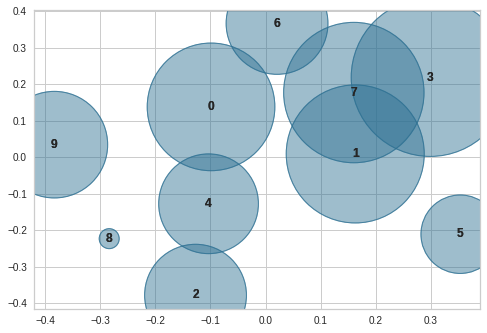

In [15]:
model = KMeans(10,random_state=0)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        
visualizer.draw()

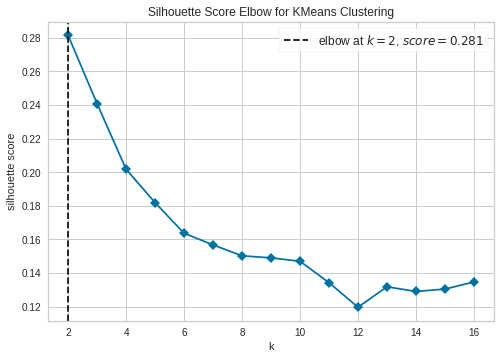

In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=0), X, k=(2,17),metric='silhouette',timings=False)  

pass

In [17]:
#after supervising
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=8)),  #trying changing this to 50 or 90 and observe the difference in accuracy
    ("log_reg", LogisticRegression(solver='lbfgs', max_iter=10000))
])
pipeline.fit(x_train, y_train)
print(pipeline.score(x_test, y_test))

0.7552083333333334


In [18]:

# from sklearn.decomposition import PCA
# acc_dict = {}
# for n_comp in range(, 8):
#   LR = LogisticRegression()
#   pca = PCA(n_components=n_comp)
#   X_pca = pca.fit_transform(X)
#   X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
#   LR.fit(X_train_pca, y_train)
#   y_predict_pca = LR.predict(X_test_pca)
#   acc_pca = accuracy_score(y_test, y_predict_pca)
#   acc_dict[n_comp] = acc_pca

# plt.plot(*zip(*sorted(acc_dict.items())))
# Title = "PCA Method to reduce feature dimension"
# plt.title(Title, fontsize=16)
# plt.xlabel("Number of Components", fontsize=16)
# plt.ylabel("Accuracy (%)", fontsize=16)

# print("Maximum accuracy:", max(acc_dict.values()))
# print("Best number of n_components:", max(acc_dict, key=acc_dict.get))

In [19]:
def fun(model):

  from sklearn.decomposition import PCA
  acc_dict = {}
  for n_comp in range(1, 8):

    
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
    model.fit(X_train_pca, y_train)
    y_predict_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_predict_pca)
    acc_dict[n_comp] = acc_pca

  plt.plot(*zip(*sorted(acc_dict.items())))
  Title = "PCA Method to reduce feature dimension"
  plt.title(Title, fontsize=16)
  plt.xlabel("Number of Components", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)

  print("Maximum accuracy:", max(acc_dict.values()))
  print("Best number of n_components:", max(acc_dict, key=acc_dict.get))
  return X_train_pca, X_test_pca, y_train_pca, y_test_pca


Maximum accuracy: 0.765625
Best number of n_components: 6


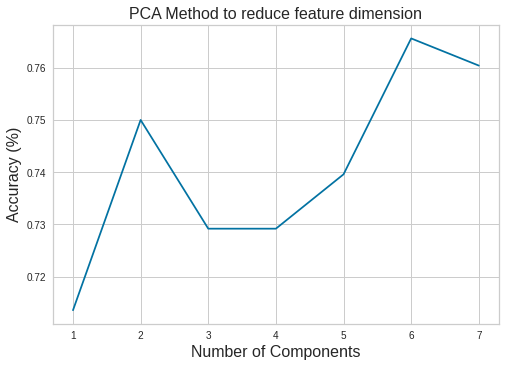

In [20]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=fun(LogisticRegression())

Maximum accuracy: 0.7239583333333334
Best number of n_components: 5


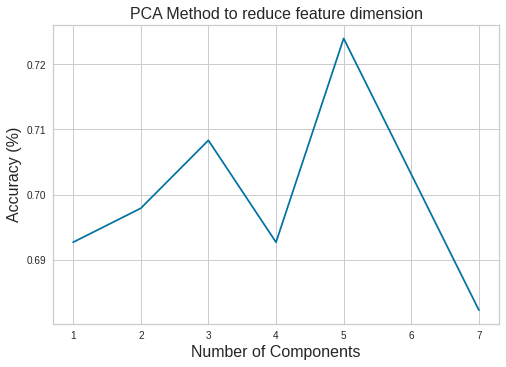

In [21]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=fun( KNeighborsClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


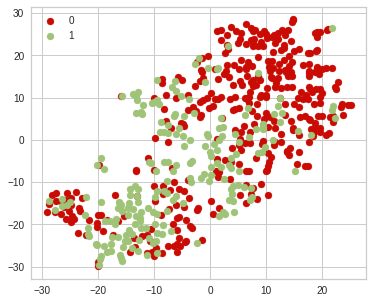

In [22]:
draw_Tsne(X_train_pca,y_train_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


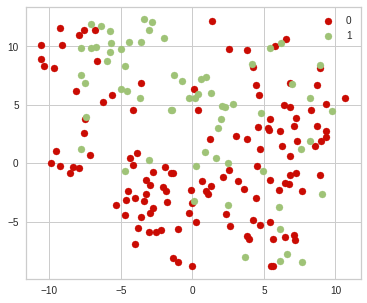

In [23]:
draw_Tsne(X_test_pca,y_test_pca)

In [24]:
from sklearn.decomposition import PCA
def pca(n):

  pca = PCA(n_components=n)
  X_pca = pca.fit_transform(X)
  X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
  model.fit(X_train_pca, y_train)
  y_predict_pca = model.predict(X_test_pca)
  acc_pca = accuracy_score(y_test, y_predict_pca)
  return X_train_pca, X_test_pca, y_train_pca, y_test_pca

In [52]:
def LogReg(x_train_new, x_test_new, y_train_new, y_test_new ):
  
  LR=LogisticRegression()
  
  LR.fit(x_train_new, y_train_new)
  
  predictions = LR.predict(x_test_new)
  print(len(predictions))
  print(len(y_test_new))
  acc_LR = accuracy_score(y_test_new, predictions)
  return acc_LR




In [56]:
def LR_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca):
  
  LR=LogisticRegression()
  LR.fit(X_train_pca, y_train_pca)
  predictions = LR.predict(X_test_pca)
  acc_LR_pca = accuracy_score(y_test_pca, predictions)
  return acc_LR_pca

In [76]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train_new, x_test_new, y_train_new, y_test_new):
  
  kNN = KNeighborsClassifier(n_neighbors=2)
 
  kNN.fit(x_train_new, y_train_new)
 
  # Predict on dataset which model has not seen before

  KNN_pred=kNN.predict(x_test_new)
  acc_knn= accuracy_score(y_test_new, KNN_pred)



  
  
  return acc_knn


In [28]:
def KNN_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca):
  
  knn = KNeighborsClassifier()
 
  knn.fit(X_train_pca, y_train_pca)
 
  # Predict on dataset which model has not seen before

  KNN_pred=knn.predict(X_test_pca)
  acc_knn_pca= accuracy_score(y_test_pca, KNN_pred)
  return acc_knn_pca

In [67]:
new_X=X[:,0:2]
new_X
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, Y, test_size=0.25, random_state=0)
print(len(x_train_new),len( x_test_new),len( y_train_new),len( y_test_new ))

576 192 576 192


In [80]:
accList=[]
for n in range(2,8):
  new_X=X[:,0:n]
  x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, Y, test_size=0.25, random_state=0)
  acc_LR=LogReg(x_train_new, x_test_new, y_train_new, y_test_new )
  X_train_pca, X_test_pca, y_train_pca, y_test_pca=pca(n)
  acc_LR_pca=LR_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
  acc_knn=KNN(x_train_new, x_test_new, y_train_new, y_test_new)
  acc_KNN_pca=KNN_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
  accList.append(acc_LR)
  accList.append(acc_LR_pca)
  accList.append(acc_knn)
  accList.append(acc_KNN_pca)

192
192
192
192
192
192
192
192
192
192
192
192


In [83]:
accList
nList=[2,3,4,5,6,7,8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

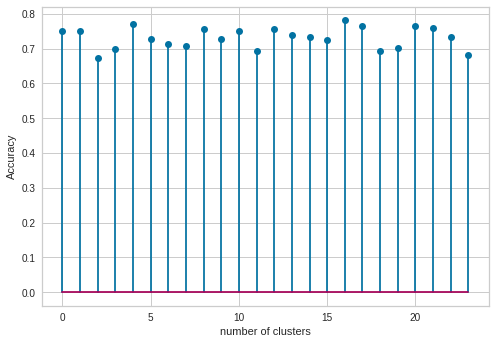

In [86]:
#plot number of neurons/number of clusters vs accuracy score
#plt.bar(accList, nList, color ='maroon')
plt.stem(accList)
plt.xlabel("number of clusters")
plt.ylabel("Accuracy")
plt.show